In [18]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [19]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [20]:
df = pd.read_csv("clean_superstore_dataset.csv", encoding='latin1')

df.head()

,Row_ID,Order_Date,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,15100992000,261.9600,259200.0,166,193,15,215,12,False,...,False,False,False,False,False,False,False,False,False,False
1,2,15100992000,731.9400,259200.0,166,193,15,215,55,False,...,False,False,False,False,False,False,False,False,False,False
2,3,14972256000,14.6200,345600.0,201,264,3,512,943,False,...,False,False,False,True,False,False,False,False,False,False
3,4,14761440000,957.5775,604800.0,687,152,8,168,319,False,...,False,False,False,False,False,False,False,False,False,True
4,5,14761440000,22.3680,604800.0,687,152,8,168,1313,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop("Turnaround_Time", axis = 1)
y = df["Turnaround_Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [22]:
X.head()

,Row_ID,Order_Date,Sales,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,Ship_Mode_same day,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,15100992000,261.9600,166,193,15,215,12,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,15100992000,731.9400,166,193,15,215,55,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,14972256000,14.6200,201,264,3,512,943,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4,14761440000,957.5775,687,152,8,168,319,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,14761440000,22.3680,687,152,8,168,1313,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
y

0       259200.0
1       259200.0
2       345600.0
3       604800.0
4       604800.0
          ...   
9552    604800.0
9553    432000.0
9554    432000.0
9555    432000.0
9556    432000.0
Name: Turnaround_Time, Length: 9557, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 132932.22631570697
Coefficients (b): [-2.47056415e-01  5.71743244e-06 -9.91388689e+00  3.02206666e+00
  6.96021487e-01 -2.96414971e+01 -3.60046790e+01  2.15233296e+01
 -3.84788117e+04 -2.22847128e+05  5.50492240e+04  2.06276716e+05
  1.54026627e+02  1.80680281e+03 -1.96082943e+03 -2.47382559e-10
  4.97276949e+03 -9.75123422e+03 -5.61762078e+03  1.03960855e+04
  1.35047940e+04 -7.18732899e+02 -1.27860611e+04  5.76455328e+02
  1.12613898e+04  7.35554853e+03  5.32827843e+03  9.64795945e+03
  5.70562510e+03 -7.70283411e+03  3.14249982e+00 -2.79994783e+03
 -1.32013661e+03  1.90180204e+03 -3.62524010e+03 -4.46224481e+03
 -2.03444226e+03 -6.78206051e+03 -1.25246411e+04 -5.28653901e+02]


In [26]:
y_pred = model.predict(X_test)
y_pred

array([187770.66771554, 192950.93656796,   3983.30990017, ...,
       439544.90696762, 286624.1977914 , 432252.05060523], shape=(1912,))

In [27]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 7280288890.033369
Coefficient of determination: 0.6923582434728549


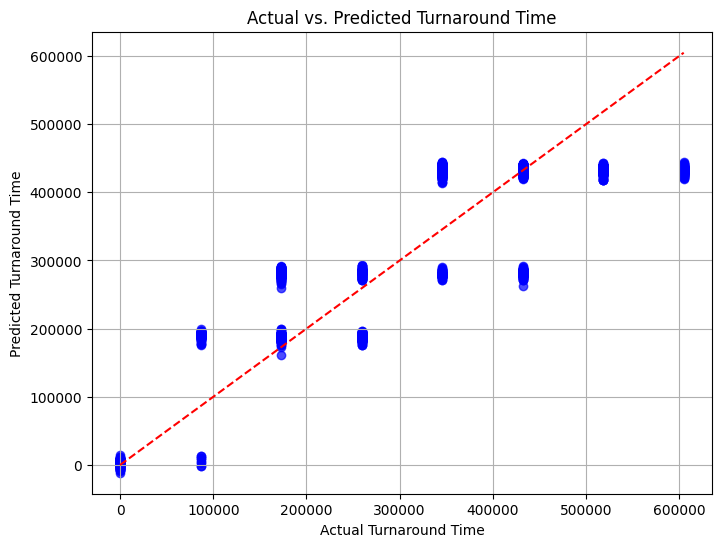

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Turnaround Time")
plt.ylabel("Predicted Turnaround Time")
plt.title("Actual vs. Predicted Turnaround Time")
plt.grid(True)
plt.show()

In [29]:
residuals = y_test - y_pred

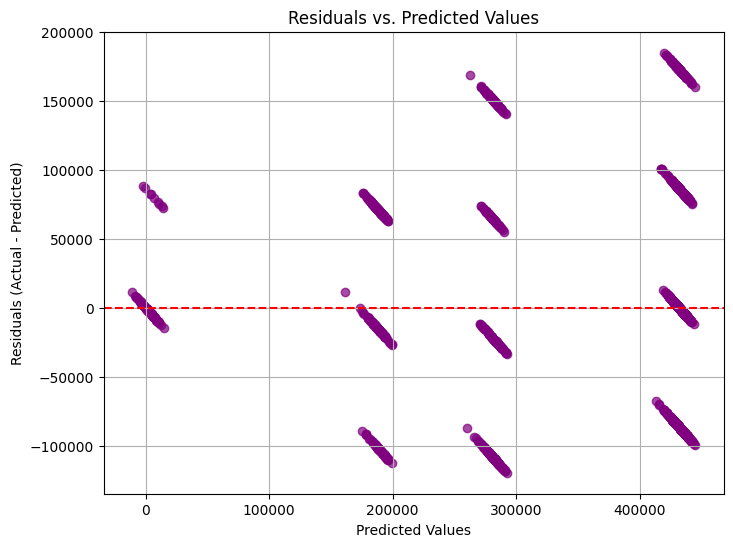

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()